# Machine Learning
The _objectives_ in the following `Notebook` are:

1. Perform Machine Learning Modelling using <code style="background:yellow;color:black">simple linear regression and tree based models</code> by proper analysis and description. 
2. Generating features with the help of feature engineering and trying to investigate it after modeling by doing `error analysis` and `Xplainable AI (XAI)`
3. Perform Comparision by models and trying to find the best one with the help of our metric function.


__Some important points:__
- For solving this problem we will be following the steps discussed in the NB and for explaining the observation `boxes` willl be used
- We have created a custom class function called `regression.py` with all the dependencies and API style coding has been used for analysis.

In [1]:
# run the libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")
%run regression.py
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# read the data and see it....
df = pd.read_csv('regression_features.csv')
df.head()

,Date,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,...,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD,Day,Month,Year
0,2013-11-01,0.750242,20854,11559,136.323810,88.363265,225.437049,13684.01190,1866.416667,2.1,...,100.49830,100.5459,101.1283,100.17150,100.6744,56.4,7070.65,Friday,11,2013
1,2013-07-01,0.827352,20575,10568,127.191304,82.222360,227.022942,13750.31522,1837.619565,-0.4,...,99.64265,100.1044,101.1423,99.43615,100.6230,50.9,6906.64,Monday,7,2013
2,2013-09-01,0.784715,20761,10774,134.185714,83.295918,234.335594,13801.39286,1846.880952,0.1,...,100.18490,100.5363,101.2066,99.84383,100.6646,55.7,7159.27,Sunday,9,2013
3,2013-12-01,0.773829,21158,10232,135.790476,89.444464,233.481929,13924.55000,1974.975000,-0.9,...,100.53380,100.4033,101.0334,100.28980,100.6767,57.3,7214.90,Sunday,12,2013
4,2013-08-01,0.760221,20609,10821,137.055000,82.221429,232.234194,14308.26190,1896.392857,0.5,...,99.91766,100.3962,101.1938,99.64082,100.6545,55.4,7186.25,Thursday,8,2013


## Data Preparation

In this we will perfrom 3 main steps:

1. Select relevant features.
2. Normalise the continous variable and one-hot encode categorical variables.
3. Perform standard scaling and prepare the data for modelling.

In [3]:
# let us prepare the dataset
X      = df.drop(columns = ['Date','StainlessSteelPrice','Day','Month','Year'])
cols   = X.columns
X      = X.values
y      = df['StainlessSteelPrice'].values

In [4]:
# normalising the data with min max scaler
scaler = MinMaxScaler(feature_range=(0, 1))
X      = scaler.fit_transform(X)
y      = scaler.fit_transform(y.reshape(-1, 1))

In [5]:
# one hot encode categorical variables and get the values
for col in ['Day','Month','Year']:
   d    = pd.get_dummies(df[col])  # get dummies
   X    = np.hstack([X,d.values])  # stack it
   cols = cols.append(d.columns)   # get col names

## Modelling

1. __Linear Regression__: This is our `baseline model`. We will do linear regression first and try to check the accuracy metrics defined after prediction of test data.

In [6]:
# Create training and testing sets (use 80% of the data for the training and reminder for testing).
reg = regression(X, y,cols,split_ratio=0.2)

The len of train data is 67
The len of test data is 17


In [7]:
## call the class function
linear_reg = reg.linear_regression()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     13.44
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           2.22e-09
Time:                        02:59:16   Log-Likelihood:                 102.92
No. Observations:                  67   AIC:                            -119.8
Df Residuals:                      24   BIC:                            -25.03
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0585      0.386      0.151      0.8

2. __Random Forest__: We will try to improve our model performance by using `Bagging` approach and  try to see which the important features which help in prediction of our values.

> The best parameters are choosen by doing a greedy search of proper hyperparams

In [8]:
%%time
## let see the modelling performance
rf = reg.random_forest(feature_importance=True)

Performing modelling for Random forest

Best parameters = {'bootstrap': True, 'criterion': 'mse', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 25}

The metrics of regression are :
Mean Absolute Error: 0.07955992341853353
Mean Absolute Percentage Error: 0.28121440821741867
Mean Squared Error: 0.008791181726146392
Root Mean Squared Error: 0.09376130185821009
R Squared: 0.7886786844674245

The feature importance are :
                    variable  importance
5          Nickel_Global_USD    0.376383
1         Steel_Orders_M_USD    0.168112
17        Copper_Global_USD     0.096949
15                    CLI_US    0.082016
4               Energy_Index    0.056296
2         IronOre_Global_USD    0.054822
13                 CLI_China    0.052634
12                    BCI_US    0.023114
0      Steel_Inventory_M_USD    0.020244
8       WTI_Crude_Global_USD    0.016856
9           Baltic_Dry_Index    0.014685
16      PMI_US_Manufacturing    0.011886
6           

3. __XG Boost__: We will try to improve our model performance by using `Boosting` approach and  try to see which the important features which help in prediction of our values.

> Here also we will do a Greedy Hyperparam search

In [9]:
%%time
## finding best params with more sophisticated modelling approach
xg = reg.XG_Boost(feature_importance=True)

Performing modelling for XG Boost Regressor

Best parameters = {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 500, 'objective': 'reg:squaredlogerror', 'subsample': 0.7}

The metrics of regression are :
Mean Absolute Error: 0.05868964056206256
Mean Absolute Percentage Error: 0.14368001805321445
Mean Squared Error: 0.004742712612694601
Root Mean Squared Error: 0.06886735520327901
R Squared: 0.885995273476517

The feature importance are :
                    variable  importance
17        Copper_Global_USD     0.180144
5          Nickel_Global_USD    0.157897
40                      2016    0.126854
1         Steel_Orders_M_USD    0.105752
13                 CLI_China    0.061231
0      Steel_Inventory_M_USD    0.056350
2         IronOre_Global_USD    0.042349
6            Zinc_Global_USD    0.040167
15                    CLI_US    0.038948
3   CoalAustralia_Global_USD    0.032339
4               Energy_Index    0.025694
12          

### Model Evaluation

Lets check the model performance by using different algorithm approach

The results of your model are:


,Model,MAE,MAPE,MSE,RMSE,R_Squared
0,Linear Regression,0.097981,0.313423,0.018123,0.134620,0.564370
1,Random Forest,0.079560,0.281214,0.008791,0.093761,0.788679
2,XG Boost,0.058690,0.143680,0.004743,0.068867,0.885995


None
The residual and error plots


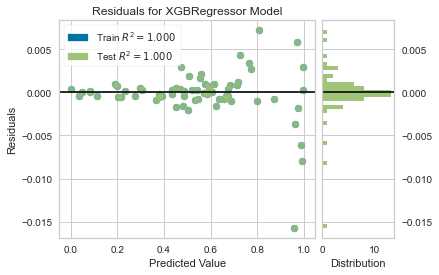

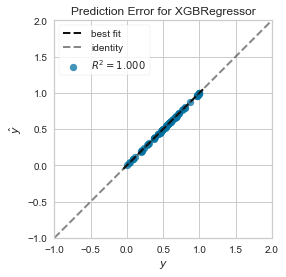

In [10]:
reg.result_plots(xg,error_plots=True)

<div class="alert alert-block alert-warning">

__Key Observations:__
    
1. There is improvement in our accuracy metrics as we use more sophisticated models our `MAPE` value is significantly decreasing.
    
2. The error analysis shows a perfect fit in the case of __XG Boost__.
    
3. Feature importances shows us that target variable is strongly coorelated with our variables of <code style="background:yellow;color:black">highest coorelation.</code>
</div>

<div class="alert alert-block alert-success">
<b>Success:</b> Let's move now towards the world of Deep Learning...
</div>